In [1]:
import numpy as np
import cv2 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D 

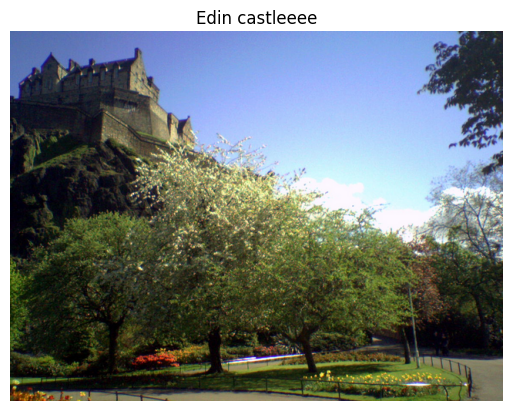

In [7]:

img = cv2.imread('edin_castle.png')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb)
plt.title('Edin castleeee')
plt.axis('off')  # Turn off axis
plt.show()

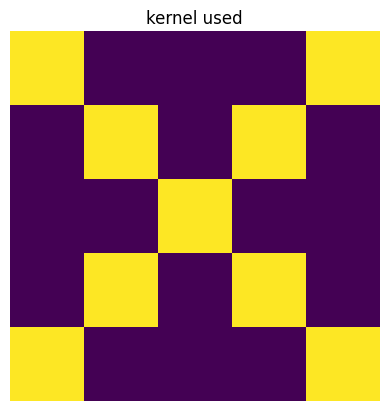

In [17]:
# chess board image given reprensent in binary
img_kernel = np.array([[1,0,0,0,1],
                       [0,1,0,1,0], 
                       [0,0,1,0,0], 
                       [0,1,0,1,0],
                       [1,0,0,0,1]]) 

img_kernel = img_kernel * 1/9
plt.imshow(img_kernel)
plt.title('kernel used')
plt.axis('off')  # Turn off axis
plt.show()

Operation shown in class to rezise image but since the image is in 3D we need to iterate through every channel to get the image in 2D to do the processing 

In [18]:
def convolution2d(image, kernel):
    m, n = kernel.shape
    y, x, channels = image.shape
    y = y - m + 1 # resize the x and y axis of the image 
    x = x - m + 1
    new_image = np.zeros((y, x, channels))  # Initialize new image with same number of channels
    for c in range(channels):  # Iterate over each channel
        for i in range(y):
            for j in range(x):
                new_image[i][j][c] = np.sum(image[i:i+m, j:j+m, c]*kernel)
    return new_image
    


ImgConvolution = convolution2d(img, img_kernel)

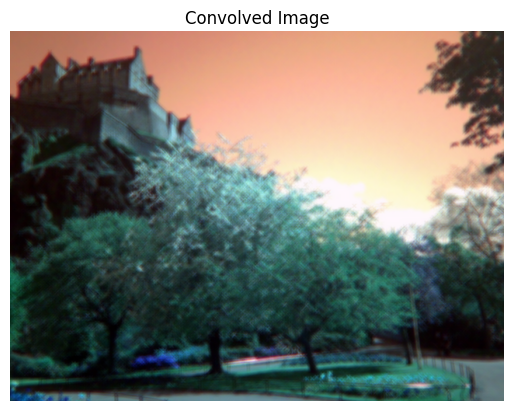

In [20]:
plt.imshow(ImgConvolution.astype(np.uint8))# make sure the image is convert to unit 8 

plt.title('Convolved Image')
plt.axis('off')
plt.show()